## Last time we covered:
* ### Numpy arrays and numpy indexing
* ### Starting plots with matplotlib

## Today we will cover:
* ### Examples: Numpy indexing review and vectorizing code
* ### Examples: more types of plotting, axis and figure handles
* ### data input and output

## Numpy indexing/matplotlib examples

In [49]:
import numpy as np

### Lets say we have some data which represents individual points in 5 groups. We want to make a bar graph of the means over each group

#### First we make some data like this: 

In [50]:
data = np.random.rand(50)
groups = np.array(['A']*10+['B']*10+['C']*10+['D']*10+['E']*10) 

#### Note the brackets around each letter e.g. ['A']. The following code doesn't work, why?

In [51]:
groups_try = np.array('A'*10+'B'*10+'C'*10+'D'*10+'E'*10) #this doesn't work

In [52]:
groups_try

array('AAAAAAAAAABBBBBBBBBBCCCCCCCCCCDDDDDDDDDDEEEEEEEEEE', dtype='<U50')

#### You can see the difference between these with the shape property

In [53]:
print(groups.shape)
print(groups_try.shape)

(50,)
()


#### So we have 50 datapoints and their corresponding groups:

In [54]:
data

array([0.44003944, 0.9402259 , 0.92032885, 0.3279997 , 0.57495299,
       0.26823588, 0.05441823, 0.80911394, 0.1189194 , 0.21374953,
       0.4200372 , 0.5265452 , 0.21679686, 0.43851751, 0.63209043,
       0.86690796, 0.49420256, 0.80557781, 0.91464978, 0.89317375,
       0.97162126, 0.19659339, 0.08240114, 0.66317005, 0.07187632,
       0.07307914, 0.40894688, 0.32964511, 0.45518883, 0.26640133,
       0.10873088, 0.99779361, 0.37144707, 0.51993144, 0.56433669,
       0.24638003, 0.43656977, 0.13870066, 0.60941802, 0.22176467,
       0.2449574 , 0.22874671, 0.78482368, 0.82212069, 0.35573622,
       0.90226016, 0.50940319, 0.27453126, 0.02884883, 0.45979649])

In [55]:
groups

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'], dtype='<U1')

### Let's get the means of each group in an array using a loop:

In [56]:
uniqueGroups = np.unique(groups) #make an array with each group only once
group_index = np.arange(len(uniqueGroups)) #index to use when looping. 
storeMeans = np.zeros(len(uniqueGroups)) #array for storing the means
for n in group_index:
    storeMeans[n] = data[groups==uniqueGroups[n]].mean()

In [58]:
group_index

array([0, 1, 2, 3, 4])

### Note: the enumerate function makes it wasy to do this without defining an index variable:

In [59]:
list(enumerate(uniqueGroups)) # this is a list of tuples, with the index and object in each tuple:

[(0, 'A'), (1, 'B'), (2, 'C'), (3, 'D'), (4, 'E')]

In [60]:
uniqueGroups = np.unique(groups)
storeMeans = np.zeros(len(uniqueGroups))
for n,g in enumerate(uniqueGroups):
    storeMeans[n] = data[groups==g].mean()

### Now let's make the plot. This time we will make figure and axes objects and use them to plot:


In [61]:
import matplotlib.pyplot as plt

### We will use the rcParams to set the default parameters. This will apply throughout the notebook so we don't need to set again.

In [62]:
plt.rcParams.update({'font.size':32,'figure.figsize':(10,10)})

### This lets you see all the parameters that can be set:

In [63]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

### Make a figure, add a subplot, make the barplot, and set the labels:

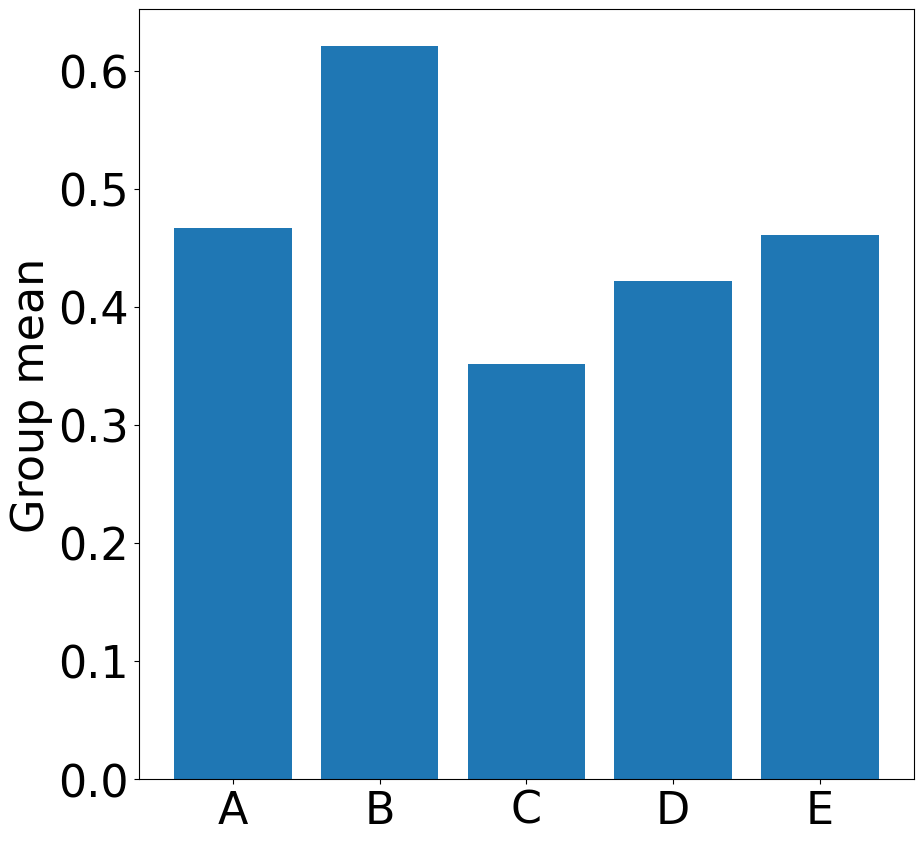

In [64]:
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(np.arange(len(storeMeans)),storeMeans)
ax.set_ylabel("Group mean",fontsize = 32)
ax.set_xticks(np.arange(len(storeMeans)))
ax.set_xticklabels(uniqueGroups);

### Another example. Let's make a scatter plot and color code the points by the distance to the origin:

### First lets make the data and compute distances:

In [ ]:
x = np.random.rand(100)
y = np.random.rand(100)
dists = np.zeros(100)

for ii in np.arange(len(x)):
    dists[ii] = x[ii]*x[ii]+y[ii]*y[ii]
    dists[ii] = np.sqrt(dists[ii])

### Better, we can compute the distances without a loop, using the elementwise operations. This is referred to as "vectorizing" the code. Note that the built in numpy function sqrt automatically works on the vector in an elementwise way.

In [66]:
x = np.random.rand(100)
y = np.random.rand(100)
dists = np.sqrt(x*x+y*y)

### Now make the plot. Using the scatter command we can color code the points:

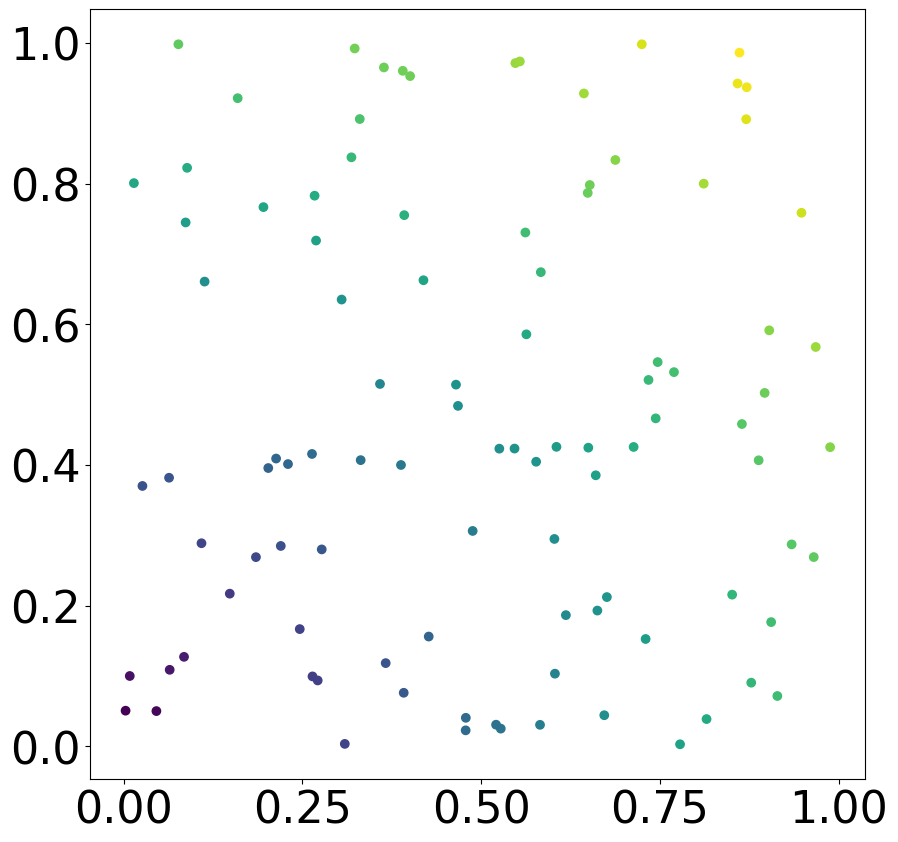

In [67]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x,y,c=dists)

### We can even add a 4th dimension of data encoded in the size of the points

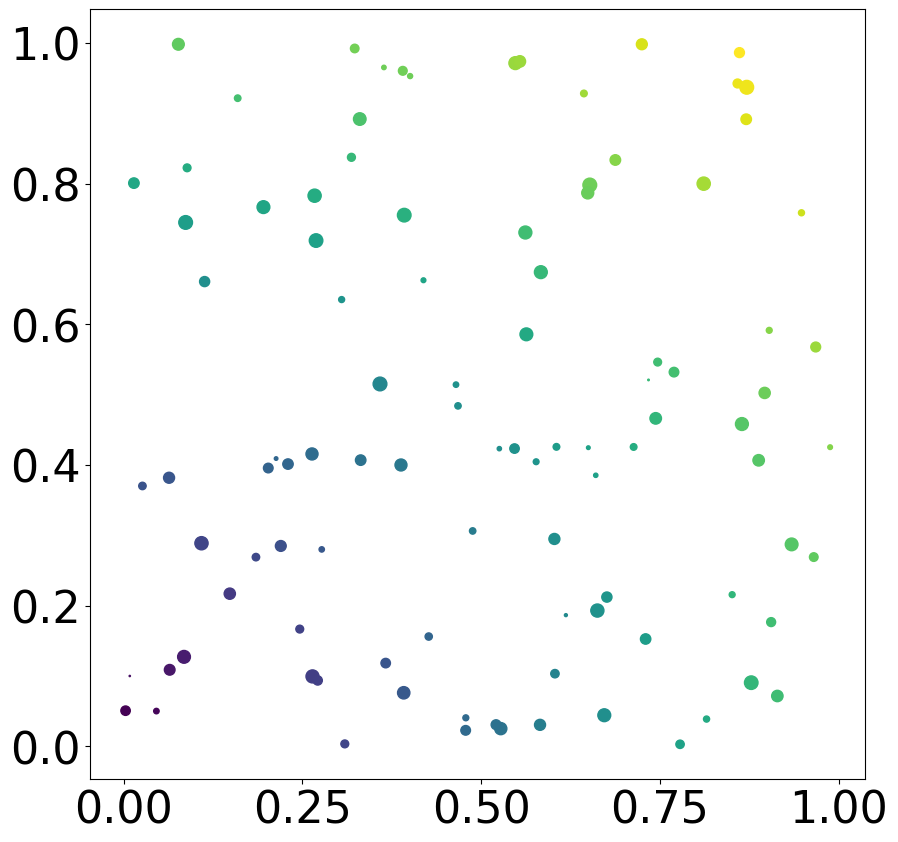

In [68]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x,y,c=dists,s = 100*np.random.rand(100));

## Inputting and outputting data:
* ### You may need to stop/start your analysis or your data may be too large to work with all at once.
* ### Data comes in a variety of formats (different instruments, collaborators, online sources etc) you need to be able to get it into python in order to work with it
* ### Other applications or people may require data formatted in particular ways

### The simplest way is to use the builtin numpy functions save and load to read from and write to disk:

### This writes the array x into the file x.npy. .npy is the format for storing a single numpy array.

In [69]:
x = np.random.rand(100)
y = np.random.rand(100)
np.save("x.npy",x)

### this file can be loaded with the np.load function. Note this funciton simply returns the array, which can be assigned to any variable

In [70]:
x_loaded = np.load("x.npy")
x_loaded-x # they are the same

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### If we want to save more than one array in the file, we can use savez and the npz format and specify the arrays to save and what they should be called: 

In [71]:
np.savez("xy.npz",x=x, y=y)

In [73]:
xy_loaded = np.load("xy.npz")
xy_loaded["y"]

array([0.03498694, 0.36608214, 0.4882623 , 0.71355613, 0.87344873,
       0.51979358, 0.09994471, 0.66795406, 0.81639916, 0.87663452,
       0.43950641, 0.83294165, 0.90960422, 0.50465307, 0.71273529,
       0.60573431, 0.94894676, 0.45893712, 0.23893979, 0.70331131,
       0.86229393, 0.34884611, 0.71691546, 0.02159494, 0.39447807,
       0.69421379, 0.13340815, 0.35307692, 0.20784942, 0.09564868,
       0.56415892, 0.47811901, 0.11075696, 0.87380715, 0.44864337,
       0.63389345, 0.94575365, 0.1015088 , 0.50534316, 0.64849727,
       0.15683161, 0.39079276, 0.34400442, 0.53411139, 0.69191901,
       0.99113936, 0.35097378, 0.12031687, 0.4632163 , 0.08687141,
       0.1472846 , 0.4166958 , 0.49100527, 0.0334743 , 0.42867254,
       0.941952  , 0.153258  , 0.44890837, 0.30477531, 0.04019318,
       0.14625541, 0.94237375, 0.98988571, 0.09383427, 0.65299335,
       0.27980153, 0.3976915 , 0.12105442, 0.41004419, 0.67573693,
       0.00413284, 0.78430893, 0.09969882, 0.99615079, 0.87050

In [74]:
xy_loaded["y"] - y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### This is very convenient if you data is going to be read back into numpy. But if it isn't, you may want to save it as text:

In [75]:
x = np.random.random((100,10))
np.savetxt("x.txt",x)
np.savetxt("xcomma.txt",x,delimiter=",")

### The load text function can then be used to read this in. Or to read text generated from any other application. 

In [76]:
x_loaded = np.loadtxt("x.txt") 

### An issue with this is that numpy only uses arrays with a single datatype. So this won't work well if you have mixed data. Next week we will learn about the pandas library which can handle this issue. 

### You can also deal with it more manually by reading the data one line at a time.

In [77]:
f = open("x.txt","r") #open the file for reading

### You can then read the file one line at a time. 

In [78]:
for line in f:
    print(line)

5.142964453402463221e-01 8.387669709127476558e-02 6.310789978240149978e-01 8.493597642250542146e-01 3.664649310543912630e-01 3.598823810233600096e-01 8.985088806597345545e-01 2.854659781360420201e-01 9.114446561285868276e-01 8.897633689329338402e-01

5.299150554602877206e-01 1.480993014523773743e-01 4.775367280736886322e-02 5.940439304469813386e-02 6.774385099610363836e-01 7.743713339982760679e-02 2.292271578188751491e-01 9.789067451487555305e-01 8.238970911237456507e-01 2.841962822884245288e-01

4.830092306738013042e-01 5.361850482412741092e-01 7.091374713223670412e-01 1.839015399078457458e-01 7.434643182480332735e-01 7.535448790145153897e-01 6.157240405790885829e-01 2.294267291496913108e-01 3.737776950180876634e-01 1.814180575441731724e-01

5.161656498872202459e-01 2.552599196101766887e-01 1.904519923136316351e-02 9.948526398552330896e-01 6.668537716345294131e-01 7.588121950406134797e-01 7.247376518449322180e-01 4.094492475189659419e-02 6.195269564222986025e-01 9.750172287802790771e-

### Note each line is read as a string regardless of what is in it. 

In [79]:
type(line)

str

### This will break up the line, but notice each element of the list is still a string. 

In [80]:
line_split = line.split()

In [81]:
line_split

['7.804755240659118076e-01',
 '6.377109195851897727e-01',
 '7.642222514210730289e-01',
 '6.185724888034155322e-01',
 '3.400980141748517482e-01',
 '9.232531105647453495e-01',
 '4.921239124555644162e-01',
 '7.642448087923778832e-01',
 '2.046053515386666577e-01',
 '6.960380189355781511e-01']

### Let's turn this into a numpy array. Note that the dtype is still string. 

In [82]:
line_split_numpy = np.array(line_split)

In [83]:
line_split_numpy

array(['7.804755240659118076e-01', '6.377109195851897727e-01',
       '7.642222514210730289e-01', '6.185724888034155322e-01',
       '3.400980141748517482e-01', '9.232531105647453495e-01',
       '4.921239124555644162e-01', '7.642448087923778832e-01',
       '2.046053515386666577e-01', '6.960380189355781511e-01'],
      dtype='<U24')

### We can now use the numpy function astype to convert these strings to numbers.

In [84]:
line_split_numpy_floats = line_split_numpy.astype("float")

In [85]:
line_split_numpy_floats

array([0.78047552, 0.63771092, 0.76422225, 0.61857249, 0.34009801,
       0.92325311, 0.49212391, 0.76424481, 0.20460535, 0.69603802])

### We can also open a file and write to it one line at a time. Be careful, this will overwrite the file that is there. 

In [86]:
f_write = open("fileToWrite.txt","w") #open file for writing. 
f_write.write("Line 1\n")
f_write.write("Line 2\n")
f_write.write("Line 3\n")
f_write.close()

### If we use "a" flag instead of "w", the text will be appended at the bottom of the file:

In [87]:
f_append = open("fileToWrite.txt","a") 
f_append.write("Line 4\n")
f_append.write("Line 5\n")
f_append.close()